# Prediction the amount of gold recovered from gold ore

We need to prepare a prototype of a machine learning model for Zyfra. The company develops efficiency solutions for heavy industry.
The model should predict the amount of gold recovered from gold ore. We have the data on extraction and purification.
The model will help to optimize the production and eliminate unprofitable parameters.

### Step 1.  Prepare the data

#### 1.1. Open the data file and study the general information

In [1]:
# import libs
import pandas as pd
from IPython.display import display
import numpy as np
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics.scorer import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy import stats

*Read the files and save them to the variables*

In [2]:
# read the data
pd.set_option('display.max_columns', 100) # set max display columns
pd.set_option('display.max_rows', 100) # set max display rows 
df_train = pd.read_csv('gold_recovery_train.csv')
df_test = pd.read_csv('gold_recovery_test.csv')
df_full = pd.read_csv('gold_recovery_full.csv')

*Print 3 random rows*

In [3]:
for df in (df_train, df_test, df_full):
    display(df.sample(n=3, random_state=12)) # use sample() method

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
8268,2017-04-25 11:59:59,4.350684,11.539729,10.138898,44.581476,67.458414,7.934731,2.755725,11.318149,2.635918,139.215126,6.045474,7.11,0.393977,7.272461,7.618751,1.059983,31.600283,13.016920,1.824112,8.326753,2.890171,1.797234e+03,-499.893840,1.754182e+03,-499.669397,1.746164e+03,-500.159494,1.575749e+03,-500.225845,46974.495488,3467.434317,3467.073725,1.999647,7.837438,3.608506,513.353712,51.235443,38.139164,7.215738,13.000321,4.699153,12.998915,4.699654,11.409922,8.089211,29.995928,20.375298,82.081000,6.084834,0.863125,19.843255,1.822863,1299.173078,-300.022281,1399.458698,-349.081134,1399.076526,-349.929097,1199.728541,-348.966738,999.633493,-351.748024,999.571534,-349.712394,11.048553,3.633636,8.748746,3.543122,35.047635,-499.835604,3.008165e+01,-499.587073,3.801073e+01,-399.529092,2.802791e+01,-499.809390,2.499943e+01,-398.749730,2.298379e+01,-398.733894,25.995962,-450.052763,24.010015,-450.086510,30.010300,-499.764880
2837,2016-05-12 04:59:59,3.689704,8.211994,8.531649,48.218577,54.216985,7.132835,2.416742,12.706315,3.522028,122.979049,15.017729,7.2

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
5646,2017-12-23 06:59:59,212.766024,14.979718,7.560,1.439275,1603.053652,-499.498128,1599.796689,-494.687453,1417.794051,-503.681911,1599.508588,-500.907056,13.150529,5.753858,512.112304,51.708525,40.135836,11.925158,13.671130,7.096887,13.673180,7.095896,1200.374983,-299.607158,1101.774488,-500.609176,1001.151949,-500.047651,900.417987,-500.619043,800.215228,-499.889006,800.200825,-500.769784,26.958112,-500.007721,25.047156,-500.255594,26.011435,-499.731685,21.005289,-499.926786,19.999192,-500.187387,14.962732,-500.083332,10.970692,-500.680624,8.997547,-499.982330,11.980103,-499.782924
780,2016-10-03 12:59:59,125.931104,4.474715,8.155,0.739241,1597.538452,-500.826652,1598.367704,-500.203313,1601.428663,-499.744152,1598.096993,-499.194577,10.038210,3.180761,398.200399,43.582975,32.544917,8.820036,9.004893,6.396192,8.994636,6.389401,1001.474795,-499.360257,1399.443651,-400.250597,1399.708294,-400.442048,1398.687026,-400.383375,1199.290497,-400.737279,1098.693626,-400.341123,22.037417,-500.210990,17.969894,-500.423956,23.017948,-499.992815,22.999553,-499.630923,12.070502,-517.196696,13.088821,-499.225506,10.868674,-500.847990,7.951589,-499.595535,23.041803,-499.967207
3713,2017-10-03 17:59:59,174.165781,6.489302,6.910,1.794655,1544.329580,-498.289697,1596.771159,-501.322643,1597.795781,-529.761961,1599.614207,-501.047537,5.930432,3.275605,567.036473,58.069011,43.525332,6.895405,17.999602,6.702545,18.001164,6.699264,991.236909,-300.036957,1392.198987,-499.388576,1344.185873,-499.571538,1290.506646,-499.448175,1097.835429,-500.355786,1094.396996,-500.234139,26.899048,-499.865893,24.000000,-500.248365,24.067193,-500.397358,19.046991,-499.995308,16.925716,-501.677113,14.953267,-400.706963,12.996794,-500.099722,10.997956,-499.841980,15.018343,-500.094272


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
5808,2016-09-12 23:59:59,4.219449,8.397460,9.601056,48.849666,63.087273,9.866108,3.028111,10.221906,4.287634,164.531518,6.001844,7.83,1.062757,9.036471,10.344891,13.103241,34.223848,14.994067,2.808585,9.560412,5.634027,1400.745470,-500.622747,1399.131982,-499.260039,1399.611616,-500.276432,1399.819648,-499.216846,37142.406721,2179.230936,2187.955258,2.821993,9.428203,3.579182,475.963646,48.122161,35.286021,10.100427,10.991113,7.129423,10.981529,7.128018,12.374236,6.522932,27.814715,22.219588,87.300226,6.206461,0.646486,18.308533,2.126697,999.581846,-499.372181,1549.881815,-499.886319,1548.475930,-500.676073,1407.980161,-501.406992,1097.038154,-499.907732,1047.972931,-497.527228,13.552930,3.914382,9.718866,5.578546,22.040228,-500.215359,12.005324,-499.943647,12.034327,-500.200186,8.000957,-499.643533,7.917770,-501.131519,5.031063,-500.143468,8.034307,-498.971569,3.060557,-500.222974,20.026247,-500.542169
6284,2016-10-02 19:59:59,3.647008,3.339003,6.520403,17.527171,62.987368,7.807477,1.914156,7.119454,2.445908,126.788617,3.963934,7.26,0.745339,4.961966,4.20

*Look at the general information of our datasets*

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [6]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

*Calculate percentage of missing values*

In [7]:
def missing_vals_per(df):
    # select columns that contain NaN values
    df_missing_cols = df[df.columns[df.isnull().any()].tolist()]
    # count percentage of NaN values
    df_missing_vals = df_missing_cols.isna().mean().round(4) * 100
    return df_missing_vals.sort_values(ascending=False)

In [8]:
missing_vals_per(df_train)

rougher.output.recovery                               15.26
rougher.output.tail_ag                                13.35
rougher.output.tail_au                                13.34
rougher.output.tail_sol                               13.34
secondary_cleaner.output.tail_sol                     11.78
rougher.input.floatbank11_xanthate                    11.29
final.output.recovery                                  9.02
primary_cleaner.input.sulfate                          7.75
primary_cleaner.input.depressant                       7.49
rougher.calculation.au_pb_ratio                        7.37
rougher.input.floatbank10_sulfate                      6.19
primary_cleaner.input.xanthate                         5.84
primary_cleaner.output.concentrate_sol                 3.77
rougher.input.floatbank11_sulfate                      3.70
rougher.state.floatbank10_e_air                        3.58
rougher.input.feed_rate                                3.04
rougher.input.feed_size                 

In [9]:
missing_vals_per(df_test)

rougher.input.floatbank11_xanthate            6.03
primary_cleaner.input.sulfate                 5.16
primary_cleaner.input.depressant              4.85
rougher.input.floatbank10_sulfate             4.39
primary_cleaner.input.xanthate                2.83
rougher.input.floatbank10_xanthate            2.10
rougher.input.feed_sol                        1.14
rougher.input.floatbank11_sulfate             0.94
rougher.input.feed_rate                       0.68
secondary_cleaner.state.floatbank3_a_air      0.58
secondary_cleaner.state.floatbank2_b_air      0.39
rougher.input.feed_size                       0.38
secondary_cleaner.state.floatbank2_a_air      0.34
rougher.state.floatbank10_f_air               0.29
rougher.state.floatbank10_a_air               0.29
rougher.state.floatbank10_b_air               0.29
rougher.state.floatbank10_d_air               0.29
rougher.state.floatbank10_e_air               0.29
rougher.state.floatbank10_c_air               0.29
rougher.state.floatbank10_f_lev

In [10]:
missing_vals_per(df_full)

rougher.output.recovery                               13.73
rougher.output.tail_ag                                12.05
rougher.output.tail_sol                               12.04
rougher.output.tail_au                                12.04
rougher.input.floatbank11_xanthate                     9.94
secondary_cleaner.output.tail_sol                      9.75
final.output.recovery                                  8.64
rougher.calculation.au_pb_ratio                        7.16
primary_cleaner.input.sulfate                          7.08
primary_cleaner.input.depressant                       6.81
rougher.input.floatbank10_sulfate                      5.73
primary_cleaner.input.xanthate                         5.07
primary_cleaner.output.concentrate_sol                 3.51
rougher.input.floatbank11_sulfate                      2.98
rougher.state.floatbank10_e_air                        2.73
rougher.input.feed_rate                                2.43
rougher.input.floatbank10_xanthate      

*Use describe() method for more information*

Check the numeric values

In [11]:
df_train.describe() # use describe() method

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,15598.000000,16860.000000,15875.000000,16778.000000,16502.000000,16224.000000,16778.000000,16777.000000,16761.000000,16579.000000,16777.000000,16820.000000,16827.000000,16820.000000,16833.000000,16822.000000,16833.000000,16821.000000,16833.000000,1.683300e+04,1.683300e+04,1.683300e+04,15618.000000,16778.000000,16632.000000,16347.000000,16443.000000,16568.000000,16777.000000,15816.000000,16514.000000,16237.000000,14956.000000,16778.000000,16778.000000,16698.000000,16778.000000,14287.000000,14610.000000,16778.000000,14611.000000,14611.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16814.000000,16802.000000,16809.000000,16257.000000,16809.000000,16802.000000,16802.000000,16776.000000,16764.000000,14874.000000,16778.000000,16497.000000,16751.000000,16705.000000,16748.000000,16763.000000,16747.000000,16752.000000,16750.000000,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775

In [12]:
df_test.describe() # use describe() method

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5816.000000,5834.000000,5789.000000,5840.000000,5599.000000,5733.000000,5801.000000,5503.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5836.000000,5840.000000,5833.000000,5840.000000,5822.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,1486.398557,-510.723606,8.736170,3.552722,458.485472,55.937535,35.105834,8.700930,13.439933,6.169553,13.056047,6.423566,1016.294703,-404.977728,1270.598553,-482.154567,1253.495045,-480.945868,1169.675564,-482.152253,1018.386311,-476.551547,962.005375,-477.795380,25.479808,-513.714941,21.083475,-512.325717,24.345831,-519.417733,20.068079,-515.028316,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,313.725248,65.417633,2.985805,1.326113,155.958272,22.724254,10.793249,2.803046,3.997715,1.673606,4.533948,1.120371,226.494775,100.953782,285.247715,55.399631,290.703157,53.759053,285.407244,54.967985,231.675756,67.002595,220.862435,68.342305,5.450424,62.448366,5.940017,63.376776,7.950733,73.968109,7.644391,60.457838,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,0.000000,-799.838846,0.000000,0.000000,0.002986,0.046369,0.000000,0.000000,0.000154,0.000052,0.000014,0.000055,-0.123194,-657.949759,-0.821921,-650.349159,-0.282087,-650.000000,-1.047388,-648.390665,-2.076798,-650.152533,-2.593390,-650.034631,0.000000,-799.608557,0.000000,-798.467243,0.000000,-799.7

In [13]:
df_full.describe() # use describe() method

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,21170.000000,22716.000000,21565.000000,22618.000000,22268.000000,21918.000000,22618.000000,22614.000000,22594.000000,22365.000000,22617.000000,22660.000000,22667.000000,22660.000000,22673.000000,22662.000000,22673.000000,22661.000000,22673.000000,2.267200e+04,2.267200e+04,2.267200e+04,21089.000000,22618.000000,22472.000000,22163.000000,22277.000000,22357.000000,22617.000000,21415.000000,22247.000000,22038.000000,20459.000000,22618.000000,22618.000000,22526.000000,22618.000000,19597.000000,19979.000000,22618.000000,19980.000000,19980.000000,22646.000000,22647.000000,22646.000000,22647.000000,22646.000000,22654.000000,22641.000000,22649.000000,22096.000000,22649.000000,22641.000000,22642.000000,22616.000000,22600.000000,20501.000000,22618.000000,22333.000000,22591.000000,22538.000000,22588.000000,22585.000000,22587.000000,22592.000000,22590.000000,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615

Check the quantitative values

In [14]:
df_train.describe(include='object')

,date
count,16860
unique,16860
top,2017-03-18 05:59:59
freq,1


In [15]:
df_test.describe(include='object')

,date
count,5856
unique,5856
top,2016-09-24 10:59:59
freq,1


In [16]:
df_full.describe(include='object')

,date
count,22716
unique,22716
top,2017-03-18 05:59:59
freq,1


In [17]:
# check the duplicates
for df in (df_train, df_test, df_full):
    print('df duplicates =', df.duplicated().sum())

df duplicates = 0
df duplicates = 0
df duplicates = 0


### Conclusion

We have 3 dataframes with 87, 53, 87 columns:
- We have missing columns in "df_test".
- We have a lot of NaN, zeros and negative values in every dataframe.
- We need to change object type to datetime in "date" column.

#### 1.2. Perform data preprocessing.

We drop NaN and zeros values

In [18]:
# look at the shape before
for df in (df_train, df_test, df_full):
    print(df.shape)

(16860, 87)
(5856, 53)
(22716, 87)


In [19]:
# drop NaN and zeros
for df in (df_train, df_test, df_full):
    df.replace(0, np.nan, inplace=True)
    df.fillna(method='ffill', inplace=True)
#     df.dropna(inplace=True)

In [20]:
# check NaN
for df in (df_train, df_test, df_full):
    print(df.isna().sum().sum())

0
0
0


In [21]:
# look at the shape after
for df in (df_train, df_test, df_full):
    print(df.shape)

(16860, 87)
(5856, 53)
(22716, 87)


#### 1.3. Check that recovery is calculated correctly

Using the training set, calculate recovery for the "rougher.output.recovery" feature. Find the MAE between our calculations and the feature values.

In [22]:
# choose variables for calculation recovery
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

- C (rougher.input.concentrate_au) - share of gold in the concentrate after flotation/purification
- F (rougher.input.feed_au) - share of gold in the feed/concentrate before flotation/purification 
- T (rougher.output.tail_au) - share of gold in the rougher tails after flotation/purification

In [23]:
# add new column with calculated recovery
df_train['rougher.output.recovery_calc'] = C * (F - T) * 100 / (F * (C - T))

In [24]:
# chose columns for calculation MAE
target_recovery = df_train['rougher.output.recovery']
calculated_recovery = df_train['rougher.output.recovery_calc']

In [25]:
# create MAE function
def mae(target_recovery, calculated_recovery):
    return abs(target_recovery - calculated_recovery).sum() / len(target_recovery)

In [26]:
# use our function for target_recovery and calculated_recovery
mae(target_recovery, calculated_recovery)

61.626515049977414

In [27]:
# drop "rougher.output.recovery_calc", we don't need it anymore
df_train.drop('rougher.output.recovery_calc', axis=1, inplace=True)

### Conclusion

We have a low MAE. So our formula is correct.

#### 1.4. Analyze the features not available in the "df_test" dataset

In [28]:
df_test_cols = list(df_train.columns.difference(df_test.columns)) # use difference method
df_test_cols

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

We haven't got haven't got our targets. Hence we need to fix it.

*Replace values from object to datetime in "date" column.*

In [29]:
# replace type with to_datetime func
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%dT%H:%M:%S')
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%dT%H:%M:%S')
df_full['date'] = pd.to_datetime(df_full['date'], format='%Y-%m-%dT%H:%M:%S')

*Restore our test dataframe*

In [30]:
# use isin() method to chose needed rows from "df_full"
df_test = df_full[df_full['date'].isin(df_test['date'])]

In [31]:
# check the dataframes shape
print(df_test.shape)
print(df_train.shape)

(5856, 87)
(16860, 87)


<div class="alert alert-danger" role="alert">
Parameters which are in train set but not in the test are parameters which you obtain during the technological process. So You don't know them at the start and cannot use them in the prediction model. The only two columns you need from source dataset for df_test are target values. You need them to check the performance of the best model.</div>

### Conclusion

We've fixed our "df_test" and "df_train" dataframes. Later we'll delete some columns for machine learning.

### Step 2. Analyze the data

#### 2.1. Study how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

*Find the columns with concentrations of metals (Au, Ag, Pb) on all stages*

In [32]:
df_au_ag_pb = pd.Series(df_full.columns)
list(df_au_ag_pb[df_au_ag_pb.str.contains('au|ag|pb')])

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_au',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_au',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.tail_au',
 'secondary_cleaner.output.tail_ag',
 'secondary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_au']

*Chose the columns with concentrations of metals (Au, Ag, Pb) for "rougher.input", "rougher.output", "primary_cleaner.output", "final.output"*

In [33]:
# # create dataframe for "au"
# df_au = df_full[['rougher.input.feed_au',
#                  'rougher.output.concentrate_au',
#                  'primary_cleaner.output.concentrate_au',
#                  'final.output.concentrate_au']]

# # create dataframe for "ag"
# df_ag = df_full[['rougher.input.feed_ag',
#                  'rougher.output.concentrate_ag',
#                  'primary_cleaner.output.concentrate_ag',
#                  'final.output.concentrate_ag']]

# # create dataframe for "pb"
# df_pb = df_full[['rougher.input.feed_pb',
#                  'rougher.output.concentrate_pb',
#                  'primary_cleaner.output.concentrate_pb',
#                  'final.output.concentrate_pb']]

# create dataframe for "au", "ag", "pb"
df_au_ag_pb = df_full[['rougher.input.feed_au',
                       'rougher.input.feed_ag',
                       'rougher.input.feed_pb',
                       'rougher.output.concentrate_au',
                       'rougher.output.concentrate_ag',
                       'rougher.output.concentrate_pb',
                       'primary_cleaner.output.concentrate_au',
                       'primary_cleaner.output.concentrate_ag',
                       'primary_cleaner.output.concentrate_pb',
                       'final.output.concentrate_au',
                       'final.output.concentrate_ag',
                       'final.output.concentrate_pb']]

*Look at "df_au_ag_pb" carefully*

In [34]:
df_au_ag_pb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 12 columns):
rougher.input.feed_au                    22716 non-null float64
rougher.input.feed_ag                    22716 non-null float64
rougher.input.feed_pb                    22716 non-null float64
rougher.output.concentrate_au            22716 non-null float64
rougher.output.concentrate_ag            22716 non-null float64
rougher.output.concentrate_pb            22716 non-null float64
primary_cleaner.output.concentrate_au    22716 non-null float64
primary_cleaner.output.concentrate_ag    22716 non-null float64
primary_cleaner.output.concentrate_pb    22716 non-null float64
final.output.concentrate_au              22716 non-null float64
final.output.concentrate_ag              22716 non-null float64
final.output.concentrate_pb              22716 non-null float64
dtypes: float64(12)
memory usage: 2.1 MB


In [35]:
df_au_ag_pb.describe() # use describe() method

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb
count,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000
mean,7.892004,8.408279,3.436187,18.702332,11.400600,7.283852,30.393582,7.964344,9.225077,41.547314,5.081098,9.504086
std,2.479189,2.513227,1.247903,5.131708,3.416522,2.166785,8.312679,2.627467,3.147824,9.869041,1.720933,2.419958
min,0.010000,0.010000,0.008001,0.009975,0.009975,0.009975,0.010000,0.010000,0.010000,0.010000,0.003432,0.006498
25%,6.617762,7.054396,2.742193,18.016961,10.214214,6.473927,29.538191,6.837287,7.896242,42.379199,4.122303,8.855272
50%,7.920893,8.380729,3.457670,20.014617,11.834863,7.617774,32.389200,8.269281,9.937873,44.643073,5.015295,9.951192
75%,9.669128,10.129492,4.220413,21.575044,13.623133,8.487389,34.803635,9.696127,11.297572,46.108853,5.950686,10.933169
max,14.093363,14.869652,7.142594,28.824507,24.480271,18.394042,45.933934,16.081632,17.081278,53.611374,16.001945,17.031899


*Plot the boxplots for different stages for "au", "ag", "pb" concentrations*

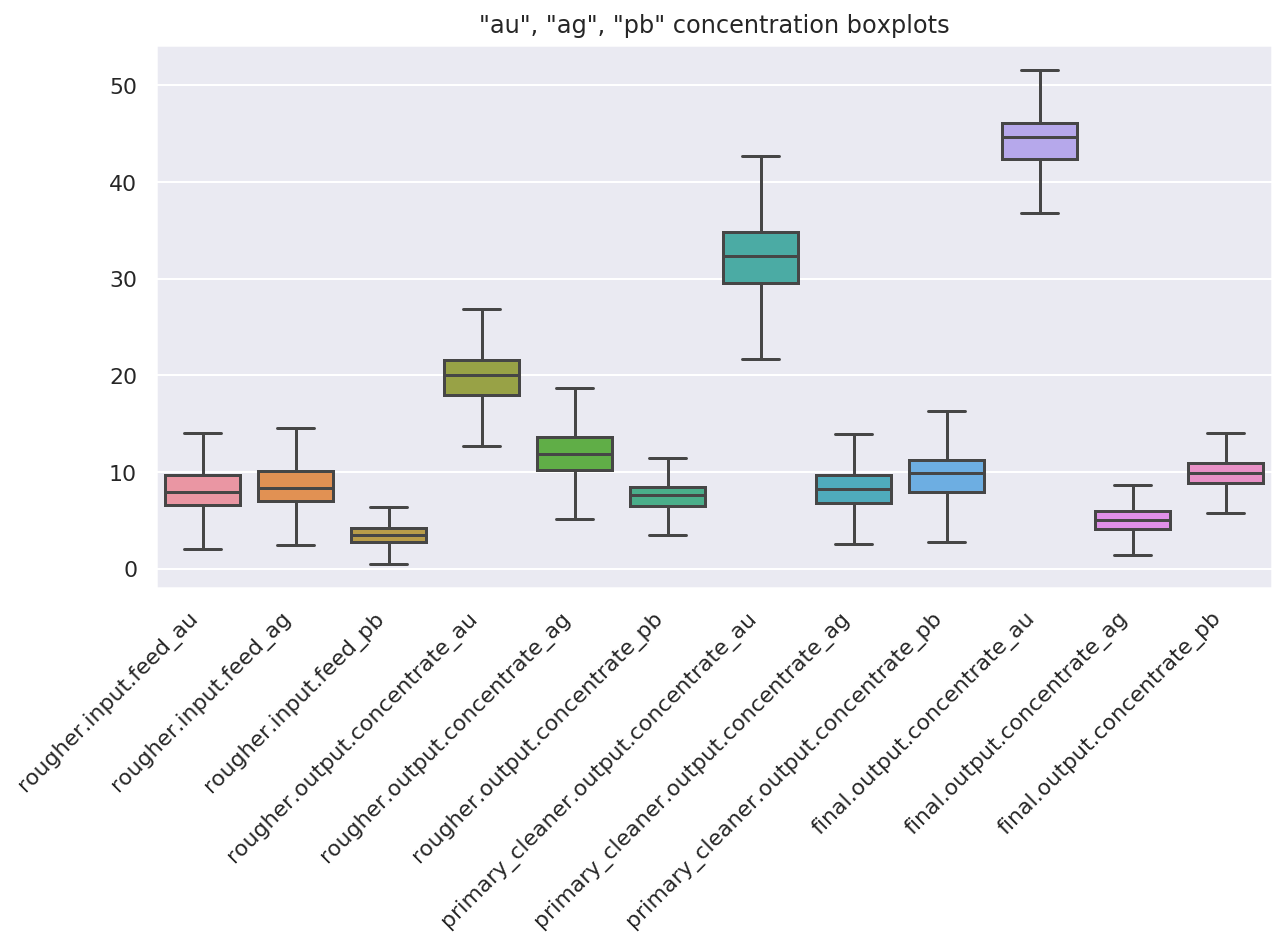

In [36]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))
plt.title('"au", "ag", "pb" concentration boxplots')
boxplot_chart = sns.boxplot(data=df_au_ag_pb,
                            showfliers = False)
boxplot_chart.set_xticklabels(boxplot_chart.get_xticklabels(),
                              rotation=45,
                              horizontalalignment='right');

*Plot the violinplots for different stages for "au", "ag", "pb" concentrations*

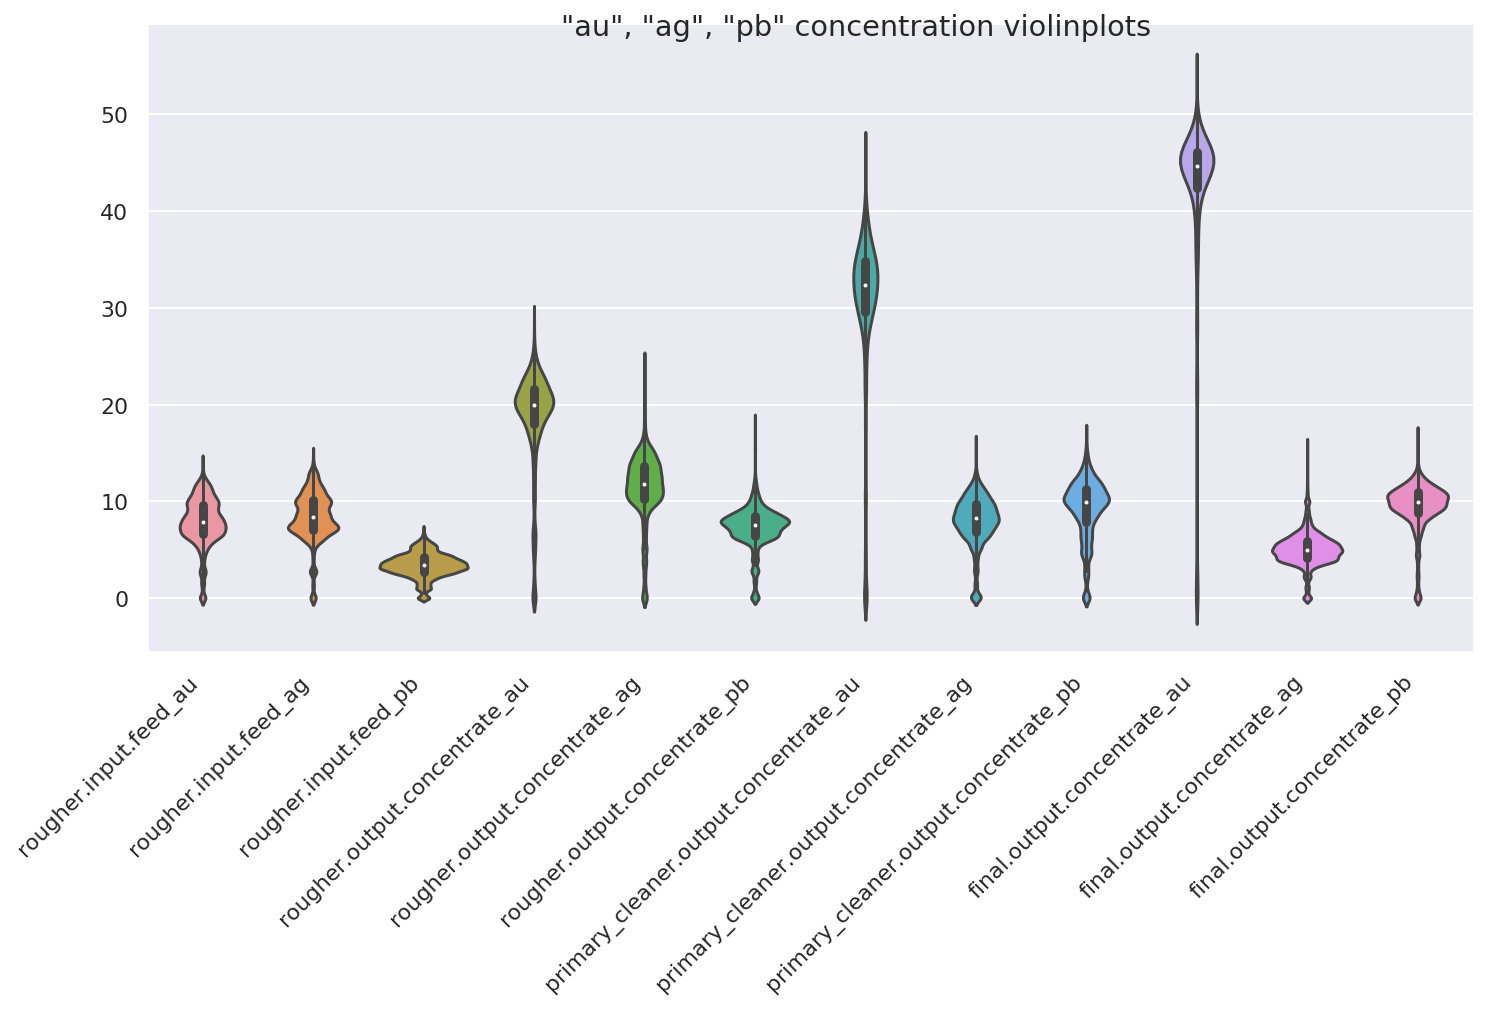

In [37]:
violin_chart = sns.catplot(kind='violin',
                           data=df_au_ag_pb)
violin_chart.fig.set_size_inches(15,5)
violin_chart.fig.suptitle('"au", "ag", "pb" concentration violinplots')
[plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right') for ax in violin_chart.axes.flat];

### Conclusion

We see that:
- the mean concentration of "au" is increasing on the every step. 
- the mean concentration of "ag" increased after flotation. But it decreased after purification process.
- the mean concentration of "pb" is increasing on the every step.

#### 2.2. Compare the feed particle size distributions in the training set and in the test set.

*Chose the columns with "rougher.input.feed_size" for the training and the test sets*

In [38]:
# create dataframes for "rougher.input.feed_size"
df_train_feed_size = df_train['rougher.input.feed_size']
df_test_feed_size = df_test['rougher.input.feed_size']

*Plot the hists for train and test sets with feed sizes*

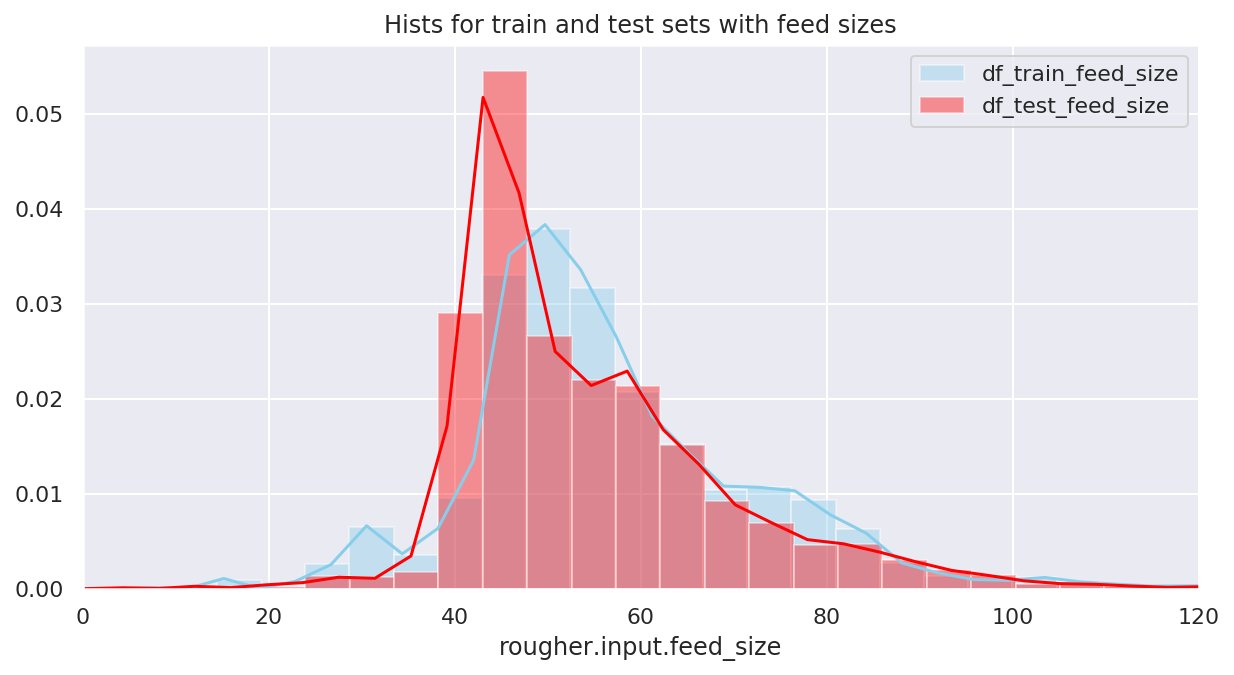

In [39]:
plt.figure(figsize=(10, 5))
plt.xlim(0, 120)
plt.title('Hists for train and test sets with feed sizes')
sns.distplot(df_train_feed_size,
             bins=100,
             color='skyblue',
             label='df_train_feed_size')
sns.distplot(df_test_feed_size,
             bins=100,
             color='red',
             label='df_test_feed_size')
plt.legend();

In [40]:
df_train_feed_size.describe()

count    16860.000000
mean        60.188595
std         30.522242
min          9.659576
25%         47.548897
50%         54.066003
75%         65.397249
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [41]:
df_test_feed_size.describe()

count    5856.000000
mean       55.898866
std        22.707969
min         0.046369
25%        43.852884
50%        49.964796
75%        61.628003
max       477.445473
Name: rougher.input.feed_size, dtype: float64

### Conclusion

As we see we have similar distributions. Std and mean looks ok. That's good for the model evaluation.

#### 2.3. Consider the total concentrations of all substances at different stages.

*Chose the columns with "rougher.input.feed_", "rougher.output.concentrate_" and "final.output.concentrate" for the training and the test sets*

In [42]:
# create new dataframes
dfs = (df_train, df_test)

for df in dfs:
    # create 'rougher.input.substances' column for raw substances concentration
    df.loc[:, 'rougher.input.substances'] = df.loc[:, ['rougher.input.feed_au',
                                'rougher.input.feed_ag',
                                'rougher.input.feed_pb',
                                'rougher.input.feed_sol']].sum(axis=1)

    # create 'rougher.output.substances' column for substances concentraion after flotation
    df.loc[:, 'rougher.output.substances'] = df.loc[:, ['rougher.output.concentrate_au',
                                'rougher.output.concentrate_ag',
                                'rougher.output.concentrate_pb',
                                'rougher.output.concentrate_sol']].sum(axis=1)

    # create 'final.output.substances' column for substances concentraion after purification
    df.loc[:, 'final.output.substances'] = df.loc[:, ['final.output.concentrate_au',
                               'final.output.concentrate_ag',
                               'final.output.concentrate_pb',
                               'final.output.concentrate_sol']].sum(axis=1)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


*Plot the hists for the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate*

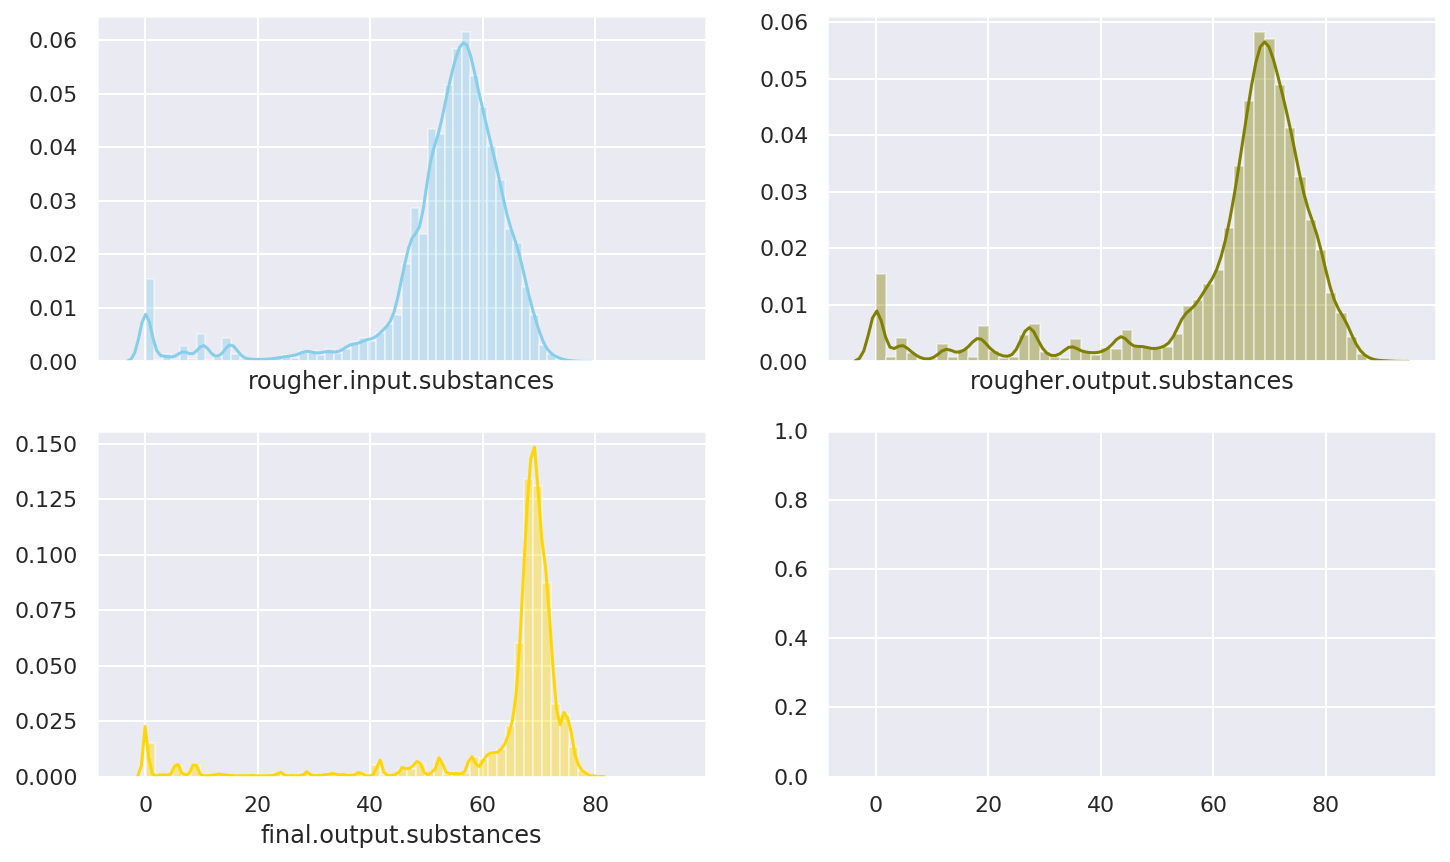

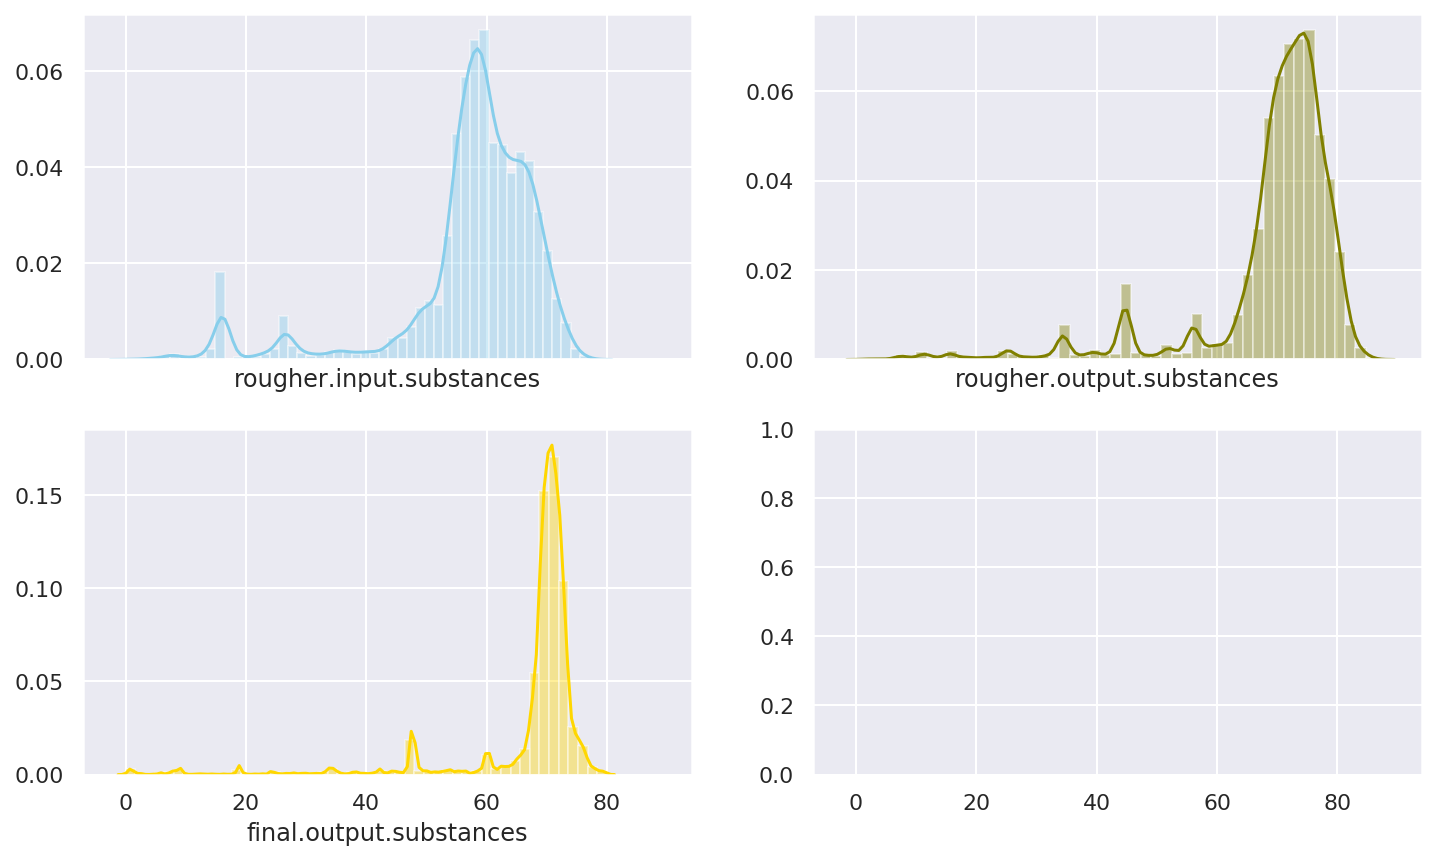

In [43]:
for df in dfs:
# plot hists
    f, axes = plt.subplots(2, 2, figsize=(12, 7), sharex=True)
    sns.distplot(df['rougher.input.substances'], color="skyblue", ax=axes[0, 0])
    sns.distplot(df['rougher.output.substances'], color="olive", ax=axes[0, 1])
    sns.distplot(df['final.output.substances'], color="gold", ax=axes[1, 0]);

*Clean the data*

In [44]:
# drop some outliers
df_train = df_train[(df_train['rougher.input.substances'] > 10) &
 (df_train['rougher.output.substances'] > 20) &
 (df_train['final.output.substances'] > 10)]

df_train.shape

(15547, 90)

In [45]:
# drop some outliers
df_test = df_test[(df_test['rougher.input.substances'] > 10) &
 (df_test['rougher.output.substances'] > 20) &
 (df_test['final.output.substances'] > 10)]

df_test.shape

(5708, 90)

In [46]:
# check the duplicates
for df in (df_train, df_test):
    print('df duplicates =', df.duplicated().sum())

df duplicates = 0
df duplicates = 0


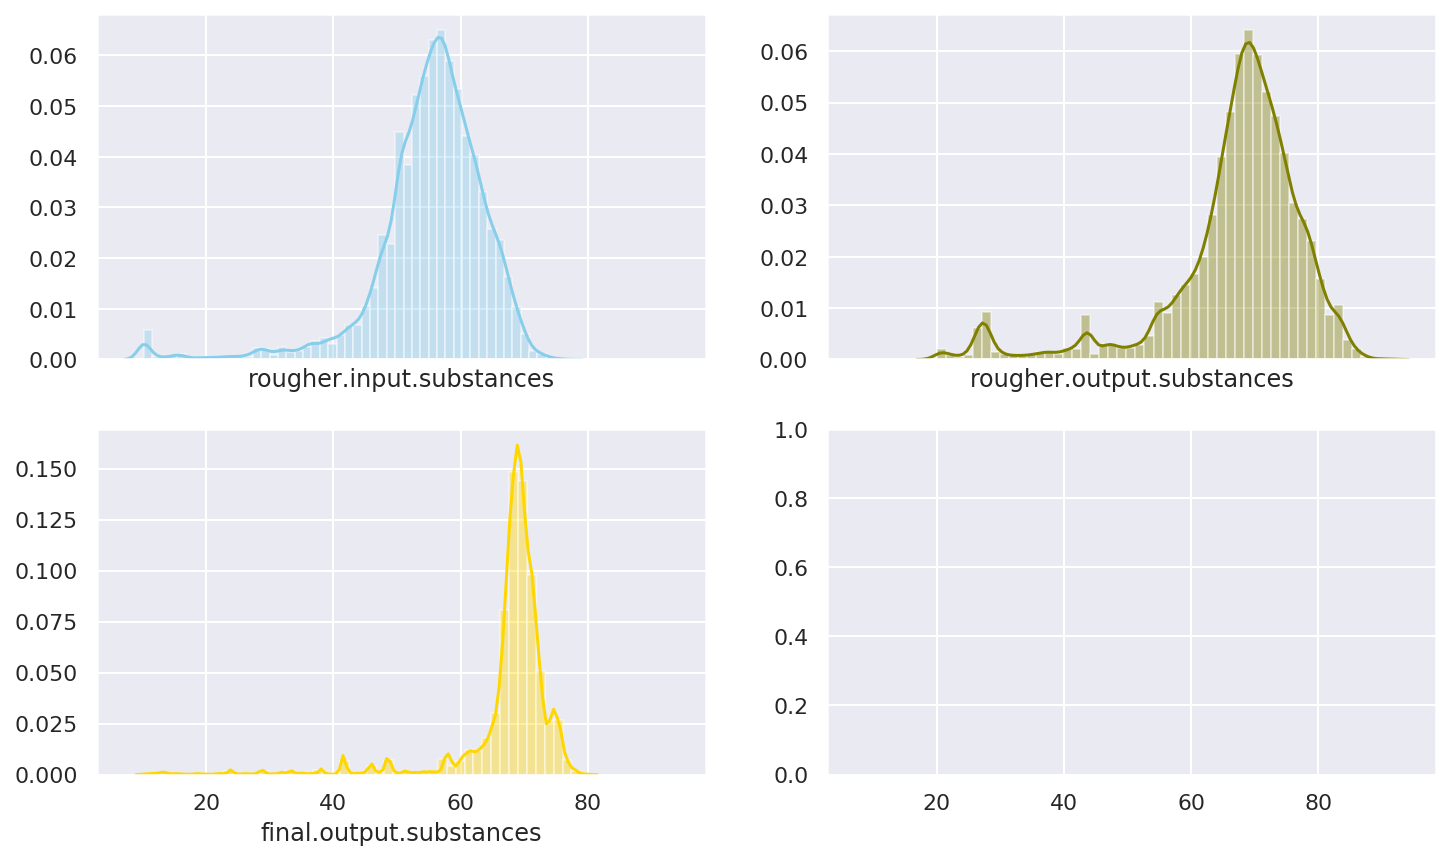

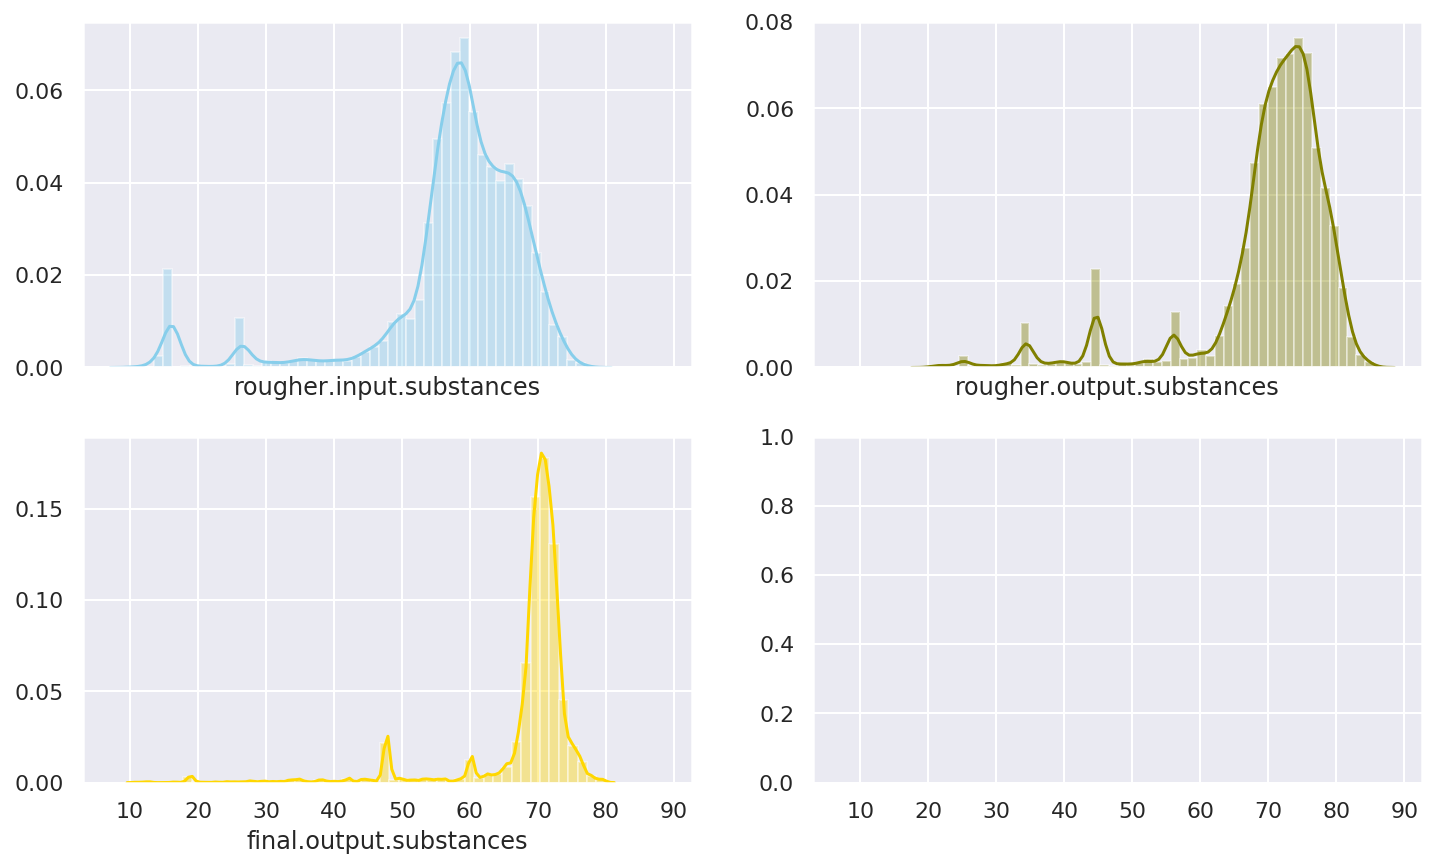

In [47]:
for df in (df_train, df_test):
# plot hists
    f, axes = plt.subplots(2, 2, figsize=(12, 7), sharex=True)
    sns.distplot(df['rougher.input.substances'], color="skyblue", ax=axes[0, 0])
    sns.distplot(df['rougher.output.substances'], color="olive", ax=axes[0, 1])
    sns.distplot(df['final.output.substances'], color="gold", ax=axes[1, 0]);

### Conclusion

We've dropped some outliers. And we dropped zeros before that.

### Step 3.  Build the model

#### 3.1. Write a function to calculate the final sMAPE value.

In [48]:
# create sMAPE function
def smape(y, y_pred, **kwargs):
    return (((abs(y - y_pred) * 2 * 100) /
              (abs(y) + abs(y_pred))).sum()) / len(y)

In [49]:
# create the final(full) sMAPE function
def full_smape(rougher_smape, final_smape):
    return 0.25 * rougher_smape.item() + 0.75 * final_smape.item()

#### 3.2. Train different models. Evaluate them using cross-validation. 

*Prepare the data before training*

In [50]:
# choose columns for deleting
df_cols_for_drop = ['final.output.concentrate_ag',
                        'final.output.concentrate_au',
                        'final.output.concentrate_pb',
                        'final.output.concentrate_sol',
                        'final.output.tail_ag',
                        'final.output.tail_au',
                        'final.output.tail_pb',
                        'final.output.tail_sol',
                        'primary_cleaner.output.concentrate_ag',
                        'primary_cleaner.output.concentrate_au',
                        'primary_cleaner.output.concentrate_pb',
                        'primary_cleaner.output.concentrate_sol',
                        'primary_cleaner.output.tail_ag',
                        'primary_cleaner.output.tail_au',
                        'primary_cleaner.output.tail_pb',
                        'primary_cleaner.output.tail_sol',
                        'rougher.calculation.au_pb_ratio',
                        'rougher.calculation.floatbank10_sulfate_to_au_feed',
                        'rougher.calculation.floatbank11_sulfate_to_au_feed',
                        'rougher.calculation.sulfate_to_au_concentrate',
                        'rougher.output.concentrate_ag',
                        'rougher.output.concentrate_au',
                        'rougher.output.concentrate_pb',
                        'rougher.output.concentrate_sol',
                        'rougher.output.tail_ag',
                        'rougher.output.tail_au',
                        'rougher.output.tail_pb',
                        'rougher.output.tail_sol',
                        'secondary_cleaner.output.tail_ag',
                        'secondary_cleaner.output.tail_au',
                        'secondary_cleaner.output.tail_pb',
                        'secondary_cleaner.output.tail_sol']

In [51]:
# drop "df_cols_for_drop" from "df_test" and "df_train"
df_test = df_test.drop(columns=df_cols_for_drop)
df_train = df_train.drop(columns=df_cols_for_drop)

In [52]:
# check the dataframes shape
print(df_test.shape)
print(df_train.shape)

(5708, 58)
(15547, 58)


In [53]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5708 entries, 5521 to 17208
Data columns (total 58 columns):
date                                          5708 non-null datetime64[ns]
final.output.recovery                         5708 non-null float64
primary_cleaner.input.sulfate                 5708 non-null float64
primary_cleaner.input.depressant              5708 non-null float64
primary_cleaner.input.feed_size               5708 non-null float64
primary_cleaner.input.xanthate                5708 non-null float64
primary_cleaner.state.floatbank8_a_air        5708 non-null float64
primary_cleaner.state.floatbank8_a_level      5708 non-null float64
primary_cleaner.state.floatbank8_b_air        5708 non-null float64
primary_cleaner.state.floatbank8_b_level      5708 non-null float64
primary_cleaner.state.floatbank8_c_air        5708 non-null float64
primary_cleaner.state.floatbank8_c_level      5708 non-null float64
primary_cleaner.state.floatbank8_d_air        5708 non-null float6

In [54]:
# сhoose the features and target for "rougher.output.recovery" target
def feature_target_rougher(df):
    # choose only columns with "rougher.input" and "rougher.state" for "features_1"
    df_cols = pd.Series(df.columns)
    features_1_col = list(df_cols[df_cols.str.contains('rougher.input|rougher.state')])
#     features_1 = df[features_1_col].drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
    features_1 = df[features_1_col]
    
    # scale the data
    scaler = StandardScaler()
    features_1 = scaler.fit_transform(features_1)
#     features_1 = pd.DataFrame(scaler.transform(features_1))
    
    # choose the column for "target_1"
    target_1 = df['rougher.output.recovery']
    
    return features_1, target_1

In [55]:
# choose features and target for "final.output.recovery" target
def feature_target_final(df):
    # choose columns for "features_2"
    features_2 = df.drop(['final.output.recovery', 'rougher.output.recovery', 'date'], axis=1)
    
    # scale the data
    scaler = StandardScaler()
    features_2 = scaler.fit_transform(features_2)
#     features_2 = pd.DataFrame(scaler.transform(features_2))
    
    # choose the column for "target_2"
    target_2 = df['final.output.recovery']
    
    return features_2, target_2

In [56]:
# # scale the data
# def scale_data(model):
#     # scale the data
#     scalar = StandardScaler()
#     pipeline = Pipeline([('transformer', scalar), ('estimator', model)])
    
#     return pipeline

In [57]:
# get cross validation scores
def get_cv_scores(model, target, features):
    # create "my_scorer" for calculation sMAPE with cross-validation
    my_scorer = make_scorer(smape)
    
    scores = cross_val_score(model,
                             features,
                             target,
                             cv=5,
                             scoring=my_scorer)
    
    return scores.mean()

In [58]:
# create features and target datasets
features_1, target_1 = feature_target_rougher(df_train)
features_2, target_2 = feature_target_final(df_train)

**Train the models.**

*Train the model with "DecisionTreeRegressor"*

In [59]:
df_decissiontree = pd.DataFrame() # create dataframe
for depth in range(2, 14):
    # create and train the model
    model_1 = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    model_2 = DecisionTreeRegressor(max_depth=depth, random_state=12345)

    # calculate sMAPE for 'rougher.output.recovery', 'final.output.recovery' and full_smape 
    rougher_smape = get_cv_scores(model_1, target_1, features_1)
    final_smape = get_cv_scores(model_2, target_2, features_2)
    full_smape_ = full_smape(rougher_smape, final_smape)

    # create temp dataframe with metrics
    df_decissiontree_temp = pd.DataFrame({'max_depth': [depth],
                                         'rougher_smape': [rougher_smape],
                                         'final_smape': [final_smape],
                                         'full_smape': [full_smape_]}) 
    
    # append info to "df_decissiontree"
    df_decissiontree = df_decissiontree.append(df_decissiontree_temp)

des_tree = df_decissiontree.reset_index(drop=True)
des_tree.sort_values(by='full_smape')

,max_depth,rougher_smape,final_smape,full_smape
0,2,8.163133,10.989457,10.282876
1,3,7.660654,11.205524,10.319306
2,4,7.908559,11.605148,10.681001
3,5,8.307044,11.813935,10.937212
4,6,8.341650,11.973033,11.065188
5,7,9.029924,12.124379,11.350766
6,8,8.972702,12.762515,11.815061
7,9,9.514409,12.757598,11.946801
8,10,10.820405,13.561794,12.876446
9,11,9.803376,14.583266,13.388293


### Conclusion

The best result with max_depth=2 (full_smape=10.282876). So we choose it for the training "RandomForestRegressor".

*Train the model with "RandomForestRegressor"*

In [60]:
df_randomforest = pd.DataFrame() # create dataframe
for est in range(1, 20):
    # create and train the model
    model_1 = RandomForestRegressor(max_depth=2, n_estimators=est, random_state=12345)
    model_2 = RandomForestRegressor(max_depth=2, n_estimators=est, random_state=12345)

    # calculate sMAPE for 'rougher.output.recovery', 'final.output.recovery' and full_smape 
    rougher_smape = get_cv_scores(model_1, target_1, features_1)
    final_smape = get_cv_scores(model_2, target_2, features_2)
    full_smape_ = full_smape(rougher_smape, final_smape)

    # create temp dataframe with metrics
    df_randomforest_temp = pd.DataFrame({'n_estimators': [est],
                                         'rougher_smape': [rougher_smape],
                                         'final_smape': [final_smape],
                                         'full_smape': [full_smape_]}) 
    
    # append info to "df_decissiontree"
    df_randomforest = df_randomforest.append(df_randomforest_temp)

random_tree = df_randomforest.reset_index(drop=True)
random_tree.sort_values(by='full_smape')

,n_estimators,rougher_smape,final_smape,full_smape
3,4,7.803364,10.894756,10.121908
4,5,7.870055,10.925239,10.161443
18,19,7.979587,10.929270,10.191849
2,3,7.923479,10.952604,10.195323
17,18,7.964100,10.951670,10.204777
6,7,7.985216,10.947135,10.206655
16,17,7.979129,10.950706,10.207812
7,8,7.910993,10.976606,10.210203
5,6,7.885336,10.990863,10.214481
14,15,7.989241,10.964372,10.220589


### Conclusion

The best result with max_depth=2, n_estimators=4 (full_smape=10.121908).

*Train the model with "LinearRegression"*

In [61]:
df_lr = pd.DataFrame() # create dataframe

# create and train the model
model_1 = LinearRegression()
model_2 = LinearRegression()

# calculate sMAPE for 'rougher.output.recovery', 'final.output.recovery' and full_smape 
rougher_smape = get_cv_scores(model_1, target_1, features_1)
final_smape = get_cv_scores(model_2, target_2, features_2)
full_smape_ = full_smape(rougher_smape, final_smape)

# create temp dataframe with metrics
df_lr_temp = pd.DataFrame({'rougher_smape': [rougher_smape],
                           'final_smape': [final_smape],
                           'full_smape': [full_smape_]}) 

# append info to "df_decissiontree"
df_lr = df_lr.append(df_lr_temp)

df_lr = df_lr.reset_index(drop=True)
df_lr

,rougher_smape,final_smape,full_smape
0,7.393197,12.896422,11.520616


### Conclusion

Our best result full_smape=11.520616. We have better on "RandomForestRegressor" (full_smape=10.121908)

**Check the quality of the model on "df_test" dataset**

In [63]:
# create features and target datasets
features_1_test, target_1_test = feature_target_rougher(df_test)
features_2_test, target_2_test = feature_target_final(df_test)

In [64]:
# df_randomforest_test = pd.DataFrame() # create dataframe

# # create and train the model
# model_1 = RandomForestRegressor(max_depth=2, n_estimators=4, random_state=12345)
# model_2 =  RandomForestRegressor(max_depth=2, n_estimators=4, random_state=12345)

# # calculate sMAPE for 'rougher.output.recovery', 'final.output.recovery' and full_smape 
# rougher_smape = get_cv_scores(model_1, target_1_test, features_1_test)
# final_smape = get_cv_scores(model_2, target_2_test, features_2_test)
# full_smape_ = full_smape(rougher_smape, final_smape)

# # create temp dataframe with metrics
# df_randomforest_test_temp = pd.DataFrame({'rougher_smape': [rougher_smape],
#                                            'final_smape': [final_smape],
#                                            'full_smape': [full_smape_]})

# # append info to "df_decissiontree"
# df_randomforest_test = df_randomforest_test.append(df_randomforest_test_temp)

# df_randomforest_test = df_randomforest_test.reset_index(drop=True)
# df_randomforest_test

In [66]:
df_randomforest_test = pd.DataFrame() # create dataframe

# create and train the model
model_1 = RandomForestRegressor(max_depth=2, n_estimators=4, random_state=12345)
model_2 =  RandomForestRegressor(max_depth=2, n_estimators=4, random_state=12345)

model_1.fit(features_1, target_1) # fit the model
model_2.fit(features_2, target_2) # fit the model

train_predictions_1 = model_1.predict(features_1_test)
train_predictions_2 = model_2.predict(features_2_test)

# calculate sMAPE for 'rougher.output.recovery', 'final.output.recovery' and full_smape 
rougher_smape = smape(target_1_test, train_predictions_1)
final_smape = smape(target_2_test, train_predictions_2)
full_smape_ = full_smape(rougher_smape, final_smape)

# create temp dataframe with metrics
df_randomforest_test_temp = pd.DataFrame({'rougher_smape': [rougher_smape],
                                           'final_smape': [final_smape],
                                           'full_smape': [full_smape_]})

# append info to "df_decissiontree"
df_randomforest_test = df_randomforest_test.append(df_randomforest_test_temp)

df_randomforest_test = df_randomforest_test.reset_index(drop=True)
df_randomforest_test

,rougher_smape,final_smape,full_smape
0,5.616767,9.758117,8.722779


### Conclusion

Our best full_smape=8.722779.

### Step 4. Overall conclusion

*The main task:*

The model should predict the amount of gold recovered from gold ore.

*Conclusion:*

We have identified that "RandomForestRegressor" with max_depth=2 and n_estimators=4 is the best model for our conditions.